## COVID-19 Research Search Examples

This python/jupyter notebook shows how to query the search.fatcat.wiki elasticsearch fulltext index.

To run this type of code or notebook yourself, you need to have the python "elasticsearch-dsl" and "matplotlib" packages installed.

First import dependencies and configure the elasticsearch client.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import elasticsearch
from elasticsearch_dsl import Search

es_client = elasticsearch.Elasticsearch("https://search.fatcat.wiki")
es_index = "covid19_fatcat_fulltext"

Run a simple query.

In [2]:
search = Search(using=es_client, index=es_index)

# fulltext search over all 
search.query(
    "query_string",
    query="pandemic ventilator",
    default_operator="AND",
    lenient=True,
    fields=["everything"],
)

# filter to only released in the year 2010 or later
search = search.filter("range", release_year=dict(gte=2010))

resp = search.execute()
print("Got {} out of {} total hits".format(len(resp), resp.hits.total))
print()
print("doc_id\t\t\t\ttitle")
for hit in resp:
    print("\t".join([hit.meta.id, hit.title[:50] + "..."]))

Got 10 out of 49022 total hits

doc_id				title
i73xvqp7zreszor3z5vpirlyuy	Infectious Disease Physicians' Perspectives Regard...
wu5pwzu4jfb2vdyj5d6h6z2l6u	Evidence for Amino Acid Changes in a 57-Base-Pair ...
mqoprn3b7baffj7b4ruy2wur4q	Co-infection between the pandemic influenza virus ...
bewkfk7nwfbs3a3d4zzzrhsnye	Evaluation of Vaccination Strategies to Suppress a...
czwkmvqsxnavxcexqiqtbjre2a	Activity of Isatine-sulphadimidine Derivatives Aga...
32bzvm6tjzgdrp2nikgdwu6qly	Prior infection with classical swine H1N1 influenz...
gfa7smnmcneyjdkhpiliqapmcq	Newly identified epitope from SARS-CoV membrane pr...
macgrabykff3xj5rukqggz4qna	FIGURE 3. Limnosida frontosa Sars, 1862 in Redescr...
p65ayitntvcnvlob75axp3zwwm	Cytherura Sars 1866...
o7lpul3ydrbdpdlgefuxwnkzxi	The 1918 influenza pandemic in New York City: age-...


Run an aggregation query and do a pie chart

article-journal=63461
chapter=3996
dataset=3810
post=1468
article=1040
graphic=691
editorial=249
letter=248
paper-conference=229
thesis=146


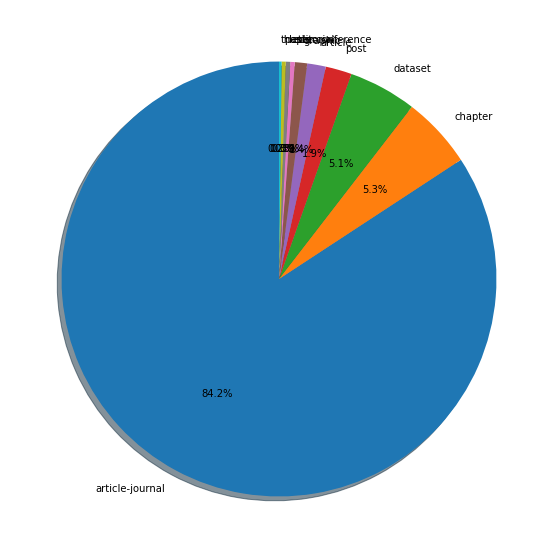

In [3]:
search = Search(using=es_client, index=es_index)

search.aggs.bucket('per_type', 'terms', field='release_type')

# return no results, only the aggregation counts
search = search[:0]

resp = search.execute()
for bucket in resp.aggregations.per_type:
    print(f"{bucket.key}={bucket.doc_count}")

counts = [b.doc_count for b in resp.aggregations.per_type]
labels = [b.key for b in resp.aggregations.per_type]


fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#ax1.axis('equal')

plt.show()

Histogram of content by year

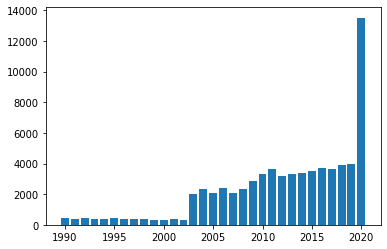

Note: SARS (SARS-CoV-1) occured in 2003; many more in-scope papers after that year


In [4]:
search = Search(using=es_client, index=es_index)


search = search.filter('range', release_year=dict(gte=1990, lte=2020))

search.aggs.bucket('per_year', 'terms', field='release_year', size=40)

# return no results, only the aggregation counts
search = search[:0]

#print(search.to_dict())

resp = search.execute()

counts = [b.doc_count for b in resp.aggregations.per_year]
years = [b.key for b in resp.aggregations.per_year]

plt.bar(years, counts)
plt.show()
print("Note: SARS (SARS-CoV-1) occured in 2003; many more in-scope papers after that year")